In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
import boydf

In [7]:
print("n1={} et n2={} à 100°C".format(n1(10), n2(100)))
TT = np.linspace(30,150,500)

n1=[2.1443658] et n2=[2.2485349] à 100°C


In [67]:
def n(T,lmbd):
    a = np.array([5.756, 0.0983, 0.2020, 189.32, 12.52, 1.32e-2])#.reshape(6,1)
    b = np.array([2.860e-6, 4.7e-8, 6.113e-8, 1.516e-4])#.reshape(4,1)
    f = (T-24.5)*(T+570.82)
    p = a[:4] + f*b
    inds = np.sqrt( p[0] + p[1]/(lmbd**2-p[2]**2) + p[3]/(lmbd**2-a[4]**2) - a[5]*lmbd**2)
    return inds

def n1(T):
    return n(T,lmbd1)

def n2(T):
    return n(T,lmbd2)

In [6]:
L=2 #cm
#lp = 6.874 #um
lmbd1 = 1.064 #um
lmbd2 = 0.532

In [90]:
cexp = 1.5e-5

def alpha(zr,T,lp,c):  
    LT = L*(1+cexp*(T-20))
    lpT = lp*(1+cexp*(T-20))
    a = LT/(2*zr)
    b = zr * 2*np.pi* (1/lpT - (n2(T)-n1(T))/lmbd2 ) * 1e4
    return c*LT/n1(T)/n2(T) * h(a,b)

def alphaa(zr,TT,lp,c):
    return np.array([alpha(zr,T,lp,c)[0] for T in TT])

In [9]:
def h(a,b):
    def f(t):
        return np.exp(1j*b*t)/(1+1j*t)
    N = 1000
    x_array = np.linspace(-a, a, N).reshape(N,1)
    f_array = np.array([f(x) for x in x_array])
    f_array = f_array.reshape(N, f_array.size // N)
    #print(f_array.shape)
    integral = np.trapz(f_array, x_array, axis=0)
    return 1 / (4*a) * np.square(np.abs(integral))

0.3803133656536438


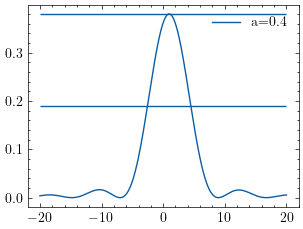

In [14]:
bb=np.linspace(-20,20,1000)
a=0.4
plt.plot(bb,h(a,bb),label='a={}'.format(a))
plt.legend()
m = np.max(h(a,bb))
print(m)
plt.hlines(m,-20,20)
plt.hlines(m/2,-20,20)
plt.show()

In [17]:
bb[h(a,bb)>m/2][0]

-2.5425425425425416

In [18]:
zr = 2.48

In [20]:
def bT(T,lp,zr):
    lpT = lp*(1+cexp*(T-20))
    return zr*2*np.pi* (1/lpT - (n2(T)-n1(T))/lmbd2 ) * 1e4

In [79]:
def fwhm(lp,zr):
    TT = np.linspace(60,100,800)
    arr = alphaa(zr,TT,lp,1)
    m = np.max(arr)
    #plt.plot(TT,arr)
    #print(arr>m/2)
    #print(TT[arr>m/2][0])
    return TT[arr>m/2][-1]-TT[arr>m/2][0]

In [80]:
fwhm(6.86,2.48)

1.0513141426783505

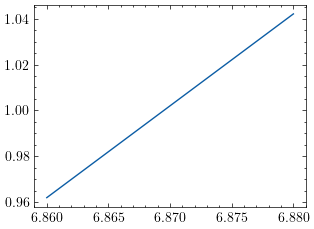

In [61]:
lp = np.linspace(6.86,6.88,2)
plt.plot(lp,[fwhm(lp,2.48) for lp in lp])
plt.show()

In [77]:
def fwhm2(lp,zr):
    TT = np.linspace(60,100,500)
    #arr = alphaa(zr,TT,lp,1)
    #m = np.max(arr)
    #plt.plot(TT,arr)
    #print(arr>m/2)
    #print(TT[arr>m/2][0])
    arr = np.array([bT(T,lp,zr) for T in TT])
    #print(arr)
    return TT[arr>-2.5][-1]-TT[arr>4.5][-1]

In [78]:
fwhm2(6.86,2.48)

1.0420841683366717

In [87]:
n1(30)

2.1496389079507217

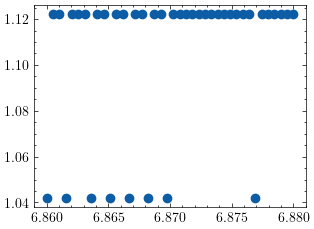

In [82]:
lp = np.linspace(6.86,6.88,40)
plt.scatter(lp,[fwhm2(lp,2.48) for lp in lp])
plt.show()

In [109]:
def fwhmf(x,y):
    #y = np.array(y)
    inds = y>np.max(y)/2
    return x[inds][-1]-x[inds][0]

In [92]:
fwhmf(TT,alphaa(2.48,TT,6.87,1))

0.9619238476953882

In [91]:
alphaa(2.48,TT,6.87,1)

array([4.99892319e-06, 7.81824207e-07, 5.17313223e-07, 4.59162982e-06,
       8.98929767e-06, 9.28277066e-06, 5.13644233e-06, 7.40694909e-07,
       6.29753632e-07, 5.04759444e-06, 9.60082744e-06, 9.66402002e-06,
       5.13003158e-06, 6.23718258e-07, 8.42008241e-07, 5.70569817e-06,
       1.03307608e-05, 9.97413178e-06, 4.95555815e-06, 4.44261524e-07,
       1.19734567e-06, 6.59582152e-06, 1.11625482e-05, 1.01668164e-05,
       4.59008793e-06, 2.35403647e-07, 1.75715963e-06, 7.74441888e-06,
       1.20572732e-05, 1.01786708e-05, 4.01916653e-06, 5.74194476e-08,
       2.60004008e-06, 9.16527084e-06, 1.29458977e-05, 9.93223551e-06,
       3.24858833e-06, 5.76793862e-09, 3.81636077e-06, 1.08454736e-05,
       1.37220368e-05, 9.34488108e-06, 2.32108771e-06, 2.17230243e-07,
       5.49565784e-06, 1.27267556e-05, 1.42384412e-05, 8.34644302e-06,
       1.33712054e-06, 8.70117716e-07, 7.70390098e-06, 1.46840096e-05,
       1.43122532e-05, 6.90823683e-06, 4.76498297e-07, 2.17255381e-06,
      

In [94]:
(2.2**2 * 3.3e-2 / (0.193*0.38) - 1)/cexp

78520.13453322426

In [95]:
n2(100)-n1(100)

0.07773651624120737

In [96]:
n2(80)-n1(80)

0.07731893558880554

In [97]:
( (n2(100)-n1(100))-(n2(80)-n1(80)) )/20

2.0879032620091386e-05

In [99]:
-2*np.pi/lmbd2*(n2(83.9)-n1(83.9)-n2(82.4)+n1(82.4))# d(delta keff)

-0.0003626168270564533

In [119]:
def fwhmb(a):
    return fwhmf(bb, h(a,bb))

In [120]:
fwhmb(0.4)

7.0070070070070045

In [121]:
zr_arr = np.linspace(0.5,3,20)

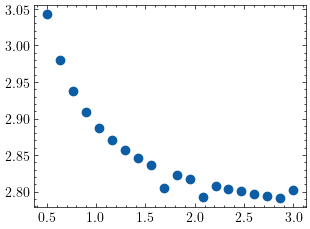

In [122]:
plt.scatter(zr_arr,[fwhmb(L/2/zr)/zr for zr in zr_arr])

In [116]:
[h(0.4,b) for b in bb]

[array([0.0037761]),
 array([0.00385822]),
 array([0.00393954]),
 array([0.00401996]),
 array([0.00409943]),
 array([0.00417785]),
 array([0.00425515]),
 array([0.00433125]),
 array([0.00440607]),
 array([0.00447954]),
 array([0.00455157]),
 array([0.00462211]),
 array([0.00469106]),
 array([0.00475837]),
 array([0.00482395]),
 array([0.00488773]),
 array([0.00494966]),
 array([0.00500965]),
 array([0.00506765]),
 array([0.00512358]),
 array([0.00517739]),
 array([0.00522902]),
 array([0.0052784]),
 array([0.00532547]),
 array([0.00537019]),
 array([0.0054125]),
 array([0.00545234]),
 array([0.00548966]),
 array([0.00552442]),
 array([0.00555658]),
 array([0.00558609]),
 array([0.0056129]),
 array([0.00563699]),
 array([0.00565831]),
 array([0.00567684]),
 array([0.00569254]),
 array([0.00570538]),
 array([0.00571535]),
 array([0.00572241]),
 array([0.00572655]),
 array([0.00572776]),
 array([0.00572601]),
 array([0.0057213]),
 array([0.00571363]),
 array([0.00570298]),
 array([0.00568

In [117]:
h(0.4,bb)

array([3.77610333e-03, 3.85822168e-03, 3.93953511e-03, 4.01996379e-03,
       4.09942820e-03, 4.17784925e-03, 4.25514835e-03, 4.33124745e-03,
       4.40606920e-03, 4.47953697e-03, 4.55157496e-03, 4.62210828e-03,
       4.69106302e-03, 4.75836635e-03, 4.82394659e-03, 4.88773328e-03,
       4.94965729e-03, 5.00965089e-03, 5.06764778e-03, 5.12358325e-03,
       5.17739420e-03, 5.22901923e-03, 5.27839873e-03, 5.32547493e-03,
       5.37019199e-03, 5.41249605e-03, 5.45233534e-03, 5.48966020e-03,
       5.52442320e-03, 5.55657915e-03, 5.58608520e-03, 5.61290090e-03,
       5.63698823e-03, 5.65831171e-03, 5.67683840e-03, 5.69253801e-03,
       5.70538289e-03, 5.71534814e-03, 5.72241163e-03, 5.72655402e-03,
       5.72775886e-03, 5.72601259e-03, 5.72130458e-03, 5.71362719e-03,
       5.70297577e-03, 5.68934872e-03, 5.67274750e-03, 5.65317667e-03,
       5.63064389e-03, 5.60515995e-03, 5.57673880e-03, 5.54539755e-03,
       5.51115648e-03, 5.47403905e-03, 5.43407190e-03, 5.39128486e-03,
      

In [114]:
b

<module 'boydf' from '/home/afqt/Desktop/boydf.py'>

In [115]:
del b

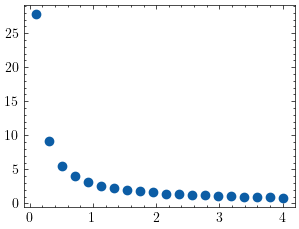

In [124]:
a_arr = np.linspace(0.1,4,20)
plt.scatter(a_arr,[fwhmb(a) for a in a_arr])

In [125]:
3.6*2.4

8.64

In [126]:
fwhmb(0.4)

7.0070070070070045